In [5]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [6]:
# colors and cmap
red = '#EF2929'
blue = '#3465A4'
golden = '#D4AF37'
gray = '#7A7A7A'
cmap = LinearSegmentedColormap.from_list('custom', [[0, 0, 0], [0.5, 0, 0.5] , [1, 0, 1]], N=3) 

In [7]:
# data files
fx_loupe_files = ['2d_data/4x_2d_loupe_72B682.pkl', '2d_data/4x_2d_loupe_73A783.pkl', '2d_data/4x_2d_loupe_C655FA.pkl']
fx_seq0_files = ['2d_data/4x_2d_seq0_9E225B.pkl', '2d_data/4x_2d_seq0_350405.pkl', '2d_data/4x_2d_seq0_076771.pkl']
fx_seq1_files = ['2d_data/4x_2d_seq1_748B84.pkl', '2d_data/4x_2d_seq1_F8733A.pkl', '2d_data/4x_2d_seq1_F3945C.pkl']
fx_seq2_files = ['2d_data/4x_2d_seq2_93381A.pkl', '2d_data/4x_2d_seq2_A4DA53.pkl', '2d_data/4x_2d_seq2_244A77.pkl']
fx_seq4_files = ['2d_data/4x_2d_seq4_08BBA4.pkl', '2d_data/4x_2d_seq4_D0D30F.pkl', '2d_data/4x_2d_seq4_C32832.pkl']

ex_loupe_files = ['2d_data/8x_2d_loupe_4F9069.pkl', '2d_data/8x_2d_loupe_5C47BE.pkl', '2d_data/8x_2d_loupe_D010FA.pkl']
ex_seq0_files = ['2d_data/8x_2d_seq0_72A09A.pkl', '2d_data/8x_2d_seq0_CB05F5.pkl', '2d_data/8x_2d_seq0_130F17.pkl']
ex_seq1_files = ['2d_data/8x_2d_seq1_848B51.pkl', '2d_data/8x_2d_seq1_948938.pkl', '2d_data/8x_2d_seq1_EC7415.pkl']
ex_seq2_files = ['2d_data/8x_2d_seq2_0B402E.pkl', '2d_data/8x_2d_seq2_4F5297.pkl', '2d_data/8x_2d_seq2_2956B7.pkl']
ex_seq4_files = ['2d_data/8x_2d_seq4_300BD3.pkl', '2d_data/8x_2d_seq4_7A9703.pkl', '2d_data/8x_2d_seq4_56CED5.pkl']

sx_loupe_files = ['2d_data/16x_2d_loupe_1CB132.pkl', '2d_data/16x_2d_loupe_CF3852.pkl', '2d_data/16x_2d_loupe_F5C5C1.pkl']
sx_seq0_files = ['2d_data/16x_2d_seq0_04BC1F.pkl', '2d_data/16x_2d_seq0_0F247E.pkl', '2d_data/16x_2d_seq0_09DB18.pkl']
sx_seq1_files = ['2d_data/16x_2d_seq1_9CB984.pkl', '2d_data/16x_2d_seq1_13BF86.pkl', '2d_data/16x_2d_seq1_E154DC.pkl']
sx_seq2_files = ['2d_data/16x_2d_seq2_8934DD.pkl', '2d_data/16x_2d_seq2_B11CEC.pkl', '2d_data/16x_2d_seq2_B68595.pkl']
sx_seq4_files = ['2d_data/16x_2d_seq4_203258.pkl', '2d_data/16x_2d_seq4_BD196A.pkl', '2d_data/16x_2d_seq4_2450E9.pkl']

lc_loupe_files = ['1d_data/4x_lc_loupe_85A60D.pkl', '1d_data/4x_lc_loupe_785FD0.pkl', '1d_data/4x_lc_loupe_FB9BE7.pkl']
lc_seq0_files = ['1d_data/4x_lc_seq0_997E9B.pkl', '1d_data/4x_lc_seq0_191014.pkl', '1d_data/4x_lc_seq0_B2F31C.pkl']
lc_seq1_files = ['1d_data/4x_lc_seq1_0F3D13.pkl', '1d_data/4x_lc_seq1_8D8ED1.pkl', '1d_data/4x_lc_seq1_9BA1F7.pkl']
lc_seq2_files = ['1d_data/4x_lc_seq2_806982.pkl', '1d_data/4x_lc_seq2_A0B684.pkl', '1d_data/4x_lc_seq2_AB92C0.pkl']
lc_seq4_files = ['1d_data/4x_lc_seq4_2C2751.pkl', '1d_data/4x_lc_seq4_8E14D6.pkl', '1d_data/4x_lc_seq4_C8B962.pkl']

In [8]:
# useful functions
def load_ssims(file1, file2, file3):
    ssim1 = pickle.load(open(file1, 'rb'))
    ssim2 = pickle.load(open(file2, 'rb'))
    ssim3 = pickle.load(open(file3, 'rb'))
    return (np.array(ssim1) + np.array(ssim2) + np.array(ssim3))*100/3

def calc_avg_for_fig6(lists_of_files):
    means_of_runs = []
    stds_of_runs = []
    
    for list_of_files in lists_of_files:
        run = []
        for file in list_of_files:
            run.append(np.round(100 * np.mean(pickle.load(open(file, 'rb'))),2))
        means_of_runs.append(np.round(np.mean(run),2))
        stds_of_runs.append(np.round(np.std(run, ddof=1),2))
    
    return means_of_runs, stds_of_runs

def calc_ratios_for_fig7(alg1_file1, alg1_file2, alg1_file3, alg2_file1, alg2_file2, alg2_file3):
    alg1_ssim1 = np.array(pickle.load(open(alg1_file1, 'rb')))
    alg1_ssim2 = np.array(pickle.load(open(alg1_file2, 'rb')))
    alg1_ssim3 = np.array(pickle.load(open(alg1_file3, 'rb')))
    
    alg2_ssim1 = np.array(pickle.load(open(alg2_file1, 'rb')))
    alg2_ssim2 = np.array(pickle.load(open(alg2_file2, 'rb')))
    alg2_ssim3 = np.array(pickle.load(open(alg2_file3, 'rb')))
    
    ratio1 = np.mean(alg1_ssim1 > alg2_ssim1)
    ratio2 = np.mean(alg1_ssim2 > alg2_ssim2)
    ratio3 = np.mean(alg1_ssim3 > alg2_ssim3)
    
    ratio_all = [ratio1, ratio2, ratio3]
    ratio_mean = 100 * np.mean(ratio_all)
    ratio_std = 100 * np.std(ratio_all)
    
    return ratio_mean, ratio_std

## Figure 1

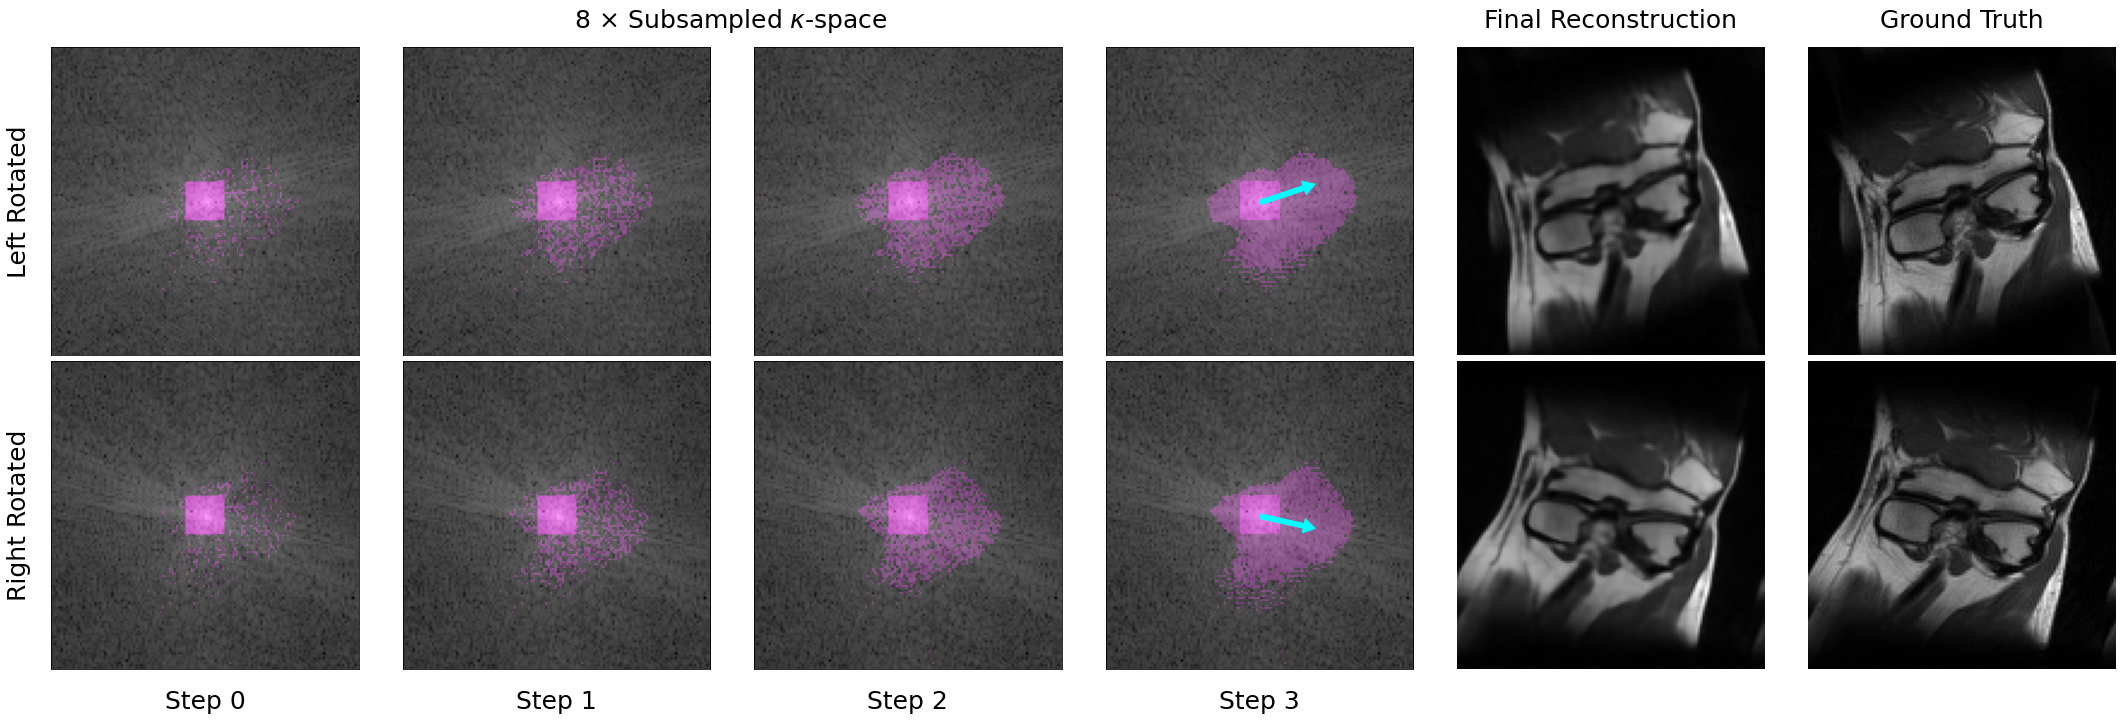

In [9]:
f, axes = plt.subplots(nrows=2, ncols=6, figsize=(30,10))
for i in range(4):
    data = pickle.load(open('teaser_data/left_test_iter=651_step{}.pkl'.format(i), 'rb'))
    data['binarized_mask'][56:72, 56:72] = 2
    axes[0, i].imshow(np.log(data['kspace']), cmap='gray')
    axes[0, i].imshow(data['binarized_mask'], cmap=cmap, alpha=0.4)
    axes[0, i].get_xaxis().set_ticks([])
    axes[0, i].get_yaxis().set_ticks([])
    if i == 3:
        axes[0, 4].imshow(data['recon'], cmap='gray')
        axes[0, 4].axis('off')
        axes[0, 5].imshow(data['input'], cmap='gray')
        axes[0, 5].axis('off')
axes[0, 0].set_ylabel('Left Rotated', fontsize=25, labelpad=20)
axes[0, 1].set_title(r'${}$ 8 $\times$ Subsampled $\kappa$-space'.format('\qquad'*7), fontsize=25, pad=20)
axes[0, 4].set_title('Final Reconstruction', fontsize=25, pad=20)
axes[0, 5].set_title('Ground Truth', fontsize=25, pad=20)
axes[0, 3].arrow(64, 64, 18, -6, width=2, fc='cyan', ec='cyan', head_length=5, alpha=1)

for i in range(4):
    data = pickle.load(open('teaser_data/right_test_iter=651_step{}.pkl'.format(i), 'rb'))
    data['binarized_mask'][56:72, 56:72] = 2
    axes[1, i].imshow(np.log(data['kspace']), cmap='gray')
    axes[1, i].imshow(data['binarized_mask'], cmap=cmap, alpha=0.4)
    axes[1, i].get_xaxis().set_ticks([])
    axes[1, i].get_yaxis().set_ticks([])
    axes[1, i].set_xlabel('Step {}'.format(i), fontsize=25, labelpad=20)
    if i == 3:
        axes[1, 4].imshow(data['recon'], cmap='gray')
        axes[1, 4].axis('off')
        axes[1, 5].imshow(data['input'], cmap='gray')
        axes[1, 5].axis('off')
axes[1, 3].arrow(64, 64, 18, 4, width=2, fc='cyan', ec='cyan', head_length=5, alpha=1)
axes[1, 0].set_ylabel('Right Rotated', fontsize=25, labelpad=20)
plt.tight_layout()
plt.show()

## Figure 5

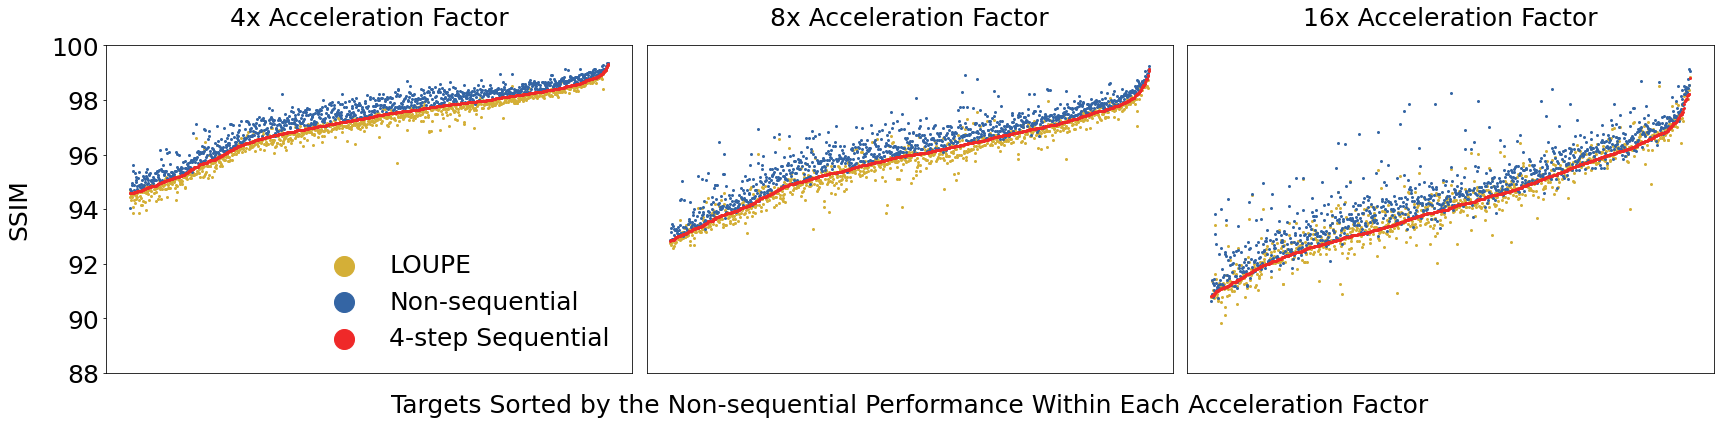

In [10]:
def plot_scatter(ax, seq0_files, seq4_files, loupe_files, which):
    show = 1000
        
    seq0_ssims = load_ssims(*seq0_files)
    seq4_ssims = load_ssims(*seq4_files)
    loupe_ssims = load_ssims(*loupe_files)

    indices = np.argsort(seq0_ssims)
    loupe = ax.scatter(range(show), loupe_ssims[indices[-show:]], s=4, c=golden)
    seq4 = ax.scatter(range(show), seq4_ssims[indices[-show:]], s=4, c=blue)
    seq0 = ax.scatter(range(show), seq0_ssims[indices[-show:]], s=4, c=red)
    
    ax.set_ylim((88, 100))   # set the xlim to left, right
    ax.set_title('{} Acceleration Factor'.format(which), fontsize=25, pad=20)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    
    if which == '4x':
        ax.legend((loupe, seq4, seq0),
                ('LOUPE', 'Non-sequential', '4-step Sequential'),
                scatterpoints=1,
                loc='lower right',
                fontsize=25,
                markerscale=10,
                frameon=False)
        ax.set_ylabel('SSIM', fontsize=25, labelpad=20)
        ax.set_yticks(range(88, 102, 2))
        ax.tick_params(axis='y', which='major', labelsize=25)
    elif which == '8x':
        ax.set_xlabel('Targets Sorted by the Non-sequential Performance Within Each Acceleration Factor', fontsize=25, labelpad=20)

f, axes = plt.subplots(nrows=1, ncols=3, figsize=(24,6))
plot_scatter(axes[0], fx_seq0_files, fx_seq4_files, fx_loupe_files, '4x')
plot_scatter(axes[1], ex_seq0_files, ex_seq4_files, ex_loupe_files, '8x')
plot_scatter(axes[2], sx_seq0_files, sx_seq4_files, sx_loupe_files, '16x')
plt.tight_layout()
plt.show()

## Figure 6

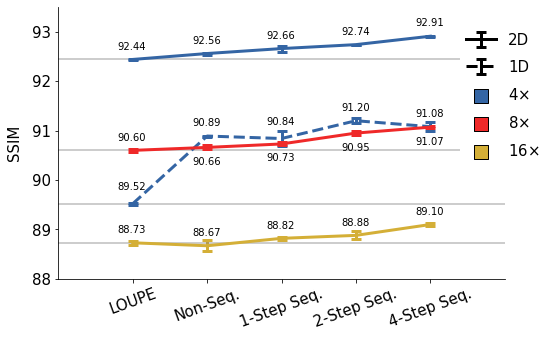

In [12]:
mean_4x, std_4x = calc_avg_for_fig6([fx_loupe_files, fx_seq0_files, fx_seq1_files, fx_seq2_files, fx_seq4_files])
mean_8x, std_8x = calc_avg_for_fig6([ex_loupe_files, ex_seq0_files, ex_seq1_files, ex_seq2_files, ex_seq4_files])
mean_16x, std_16x = calc_avg_for_fig6([sx_loupe_files, sx_seq0_files, sx_seq1_files, sx_seq2_files, sx_seq4_files])
mean_4x_lc, std_4x_lc = calc_avg_for_fig6([lc_loupe_files, lc_seq0_files, lc_seq1_files, lc_seq2_files, lc_seq4_files])

mean_4x = [92.44, 92.56, 92.66, 92.74, 92.91]
std_4x = [0.01, 0.02, 0.06, 0.00, 0.01]
mean_8x = [90.60, 90.66, 90.73, 90.95, 91.07]
std_8x = [0.03, 0.04, 0.03, 0.04, 0.02]
mean_16x = [88.73, 88.67, 88.82, 88.88, 89.10]
std_16x = [0.04, 0.11, 0.03, 0.08, 0.03]

mean_4x_lc = [89.52, 90.89, 90.84, 91.20, 91.08]
std_4x_lc = [0.02, 0.01, 0.16, 0.05, 0.09]

x = np.arange(5)

plt.figure(figsize=(8,5))
plt.ylim([88, 93.5])
plt.axhline(89.52, alpha=0.5, color=gray)
plt.axhline(92.44, alpha=0.5, color=gray)
plt.axhline(90.60, alpha=0.5, color=gray)
plt.axhline(88.73, alpha=0.5, color=gray)
plt.errorbar(x, mean_4x_lc, std_4x_lc, ls='--', lw=3, elinewidth=3, markeredgewidth=3, capsize=5, color=blue)
plt.errorbar(x, mean_4x, std_4x, lw=3, elinewidth=3, markeredgewidth=3, capsize=5, color=blue)
plt.errorbar(x, mean_8x, std_8x, lw=3, elinewidth=3, markeredgewidth=3, capsize=5, color=red)
plt.errorbar(x, mean_16x, std_16x, lw=3, elinewidth=3, markeredgewidth=3, capsize=5, color=golden)
line1 = plt.errorbar(x-6, mean_4x, std_4x, lw=3, elinewidth=3, markeredgewidth=3, capsize=5, color='black')
line2 = plt.errorbar(x-6, mean_4x_lc, std_4x_lc, ls='--', lw=3, elinewidth=3, markeredgewidth=3, capsize=5, color='black')
fx = plt.scatter(-6, 0, marker='s', edgecolors='black', s=2, c=blue)
ex = plt.scatter(-6, 0, marker='s', edgecolors='black', s=2, c=red)
sx = plt.scatter(-6, 0, marker='s', edgecolors='black', s=2, c=golden)

plt.xlim([-1., 5])
plt.xticks(x, ['LOUPE', 'Non-Seq.', '1-Step Seq.', '2-Step Seq.', '4-Step Seq.'], rotation=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('SSIM', fontsize=15, labelpad=10)

data_list = [mean_4x_lc, mean_4x, mean_8x, mean_16x]
for i, data in enumerate(data_list):
    for j, entry in enumerate(data):
        if i == 0:
            if j == 0 or j == 2:
                plt.text(j-0.2, entry+0.28,'{}'.format(format(entry, '.2f')))
                continue
        if i == 2:
            if j != 0:
                plt.text(j-0.2, entry-0.35,'{}'.format(format(entry, '.2f')))
                continue
            
        plt.text(j-0.2, entry+0.2,'{}'.format(format(entry, '.2f')))

plt.legend((line1, line2, fx, ex, sx),
            ('2D', '1D', r'4$\times$', r'8$\times$', r'16$\times$'),
            scatterpoints=1,
            loc=[0.9,0.42],
            fontsize=15,
            markerscale=10,
            facecolor='white',
            edgecolor='white',
            framealpha=1,
            labelspacing=0.8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

## Figure 7

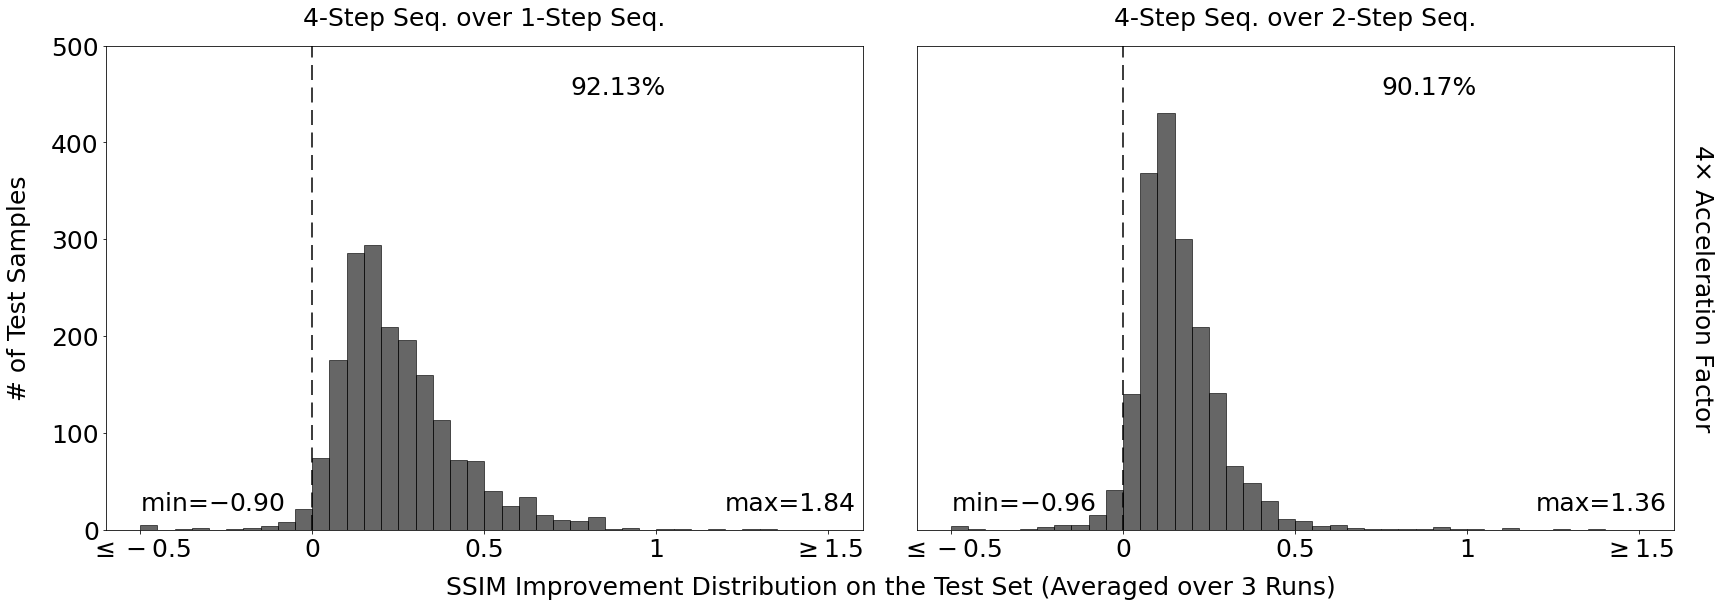

In [8]:
def plot_histograms(ax, alg1_files, alg2_files, which):
    low = -0.5
    high = 1.5
    step = 0.05
    edges = np.arange(low, step+high, step);
        
    alg1_ssims = load_ssims(*alg1_files)
    alg2_ssims = load_ssims(*alg2_files)
    ratio_mean, ratio_std = calc_ratios_for_fig7(*alg1_files, *alg2_files)

    alg1_over_alg2 = alg1_ssims - alg2_ssims
    minimum = alg1_over_alg2.min()
    maximum = alg1_over_alg2.max()
    alg1_over_alg2 = np.clip(alg1_over_alg2, low, high)
    ax.hist(alg1_over_alg2, bins=edges, color='black', edgecolor='black', alpha=0.6)
    ax.axvline(0, ls='--', dashes=(10, 5), color='black')
    ax.set_ylim([0,500])
    ax.set_title(which, fontsize=25, pad=20)
    ax.set_xticks([-0.5, 0, 0.5, 1, 1.5])
    ax.set_xticklabels([r'$\leq -0.5$', '0', '0.5', '1', r'$\geq 1.5$'])
    ax.get_yaxis().set_ticks([])
    ax.tick_params(axis='both', which='major', labelsize=25)
    ax.text(-0.5, 20, r'min=${}$'.format(format(minimum, '.2f')), fontsize=25)
    ax.text(1.2, 20, 'max={}'.format(format(maximum, '.2f')), fontsize=25)
    ax.text(0.75, 450, '{}%'.format(format(ratio_mean, '.2f')), fontsize=25)
    
    if which == '4-Step Seq. over 1-Step Seq.':
        ax.set_ylabel('# of Test Samples', fontsize=25, labelpad=20)
        ax.set_yticks(range(0, 600, 100))
    elif which == '4-Step Seq. over 2-Step Seq.':
        ax.yaxis.set_label_position('right')
        ax.set_ylabel(r'4$\times$ Acceleration Factor', fontsize=25, labelpad=40, rotation=270)
        
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(24,8), sharex=True)
plot_histograms(axes[0], fx_seq4_files, fx_seq1_files, '4-Step Seq. over 1-Step Seq.')
plot_histograms(axes[1], fx_seq4_files, fx_seq2_files, '4-Step Seq. over 2-Step Seq.')
f.text(0.26,-0.04,'SSIM Improvement Distribution on the Test Set (Averaged over 3 Runs)', fontsize=25)
plt.tight_layout()
plt.show()